In [18]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import scipy

In [19]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [20]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [21]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [22]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

C:\Users\ormis\AppData\Local\Temp\ipykernel_19748\4196587217.py:4: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [23]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [24]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [25]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [26]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

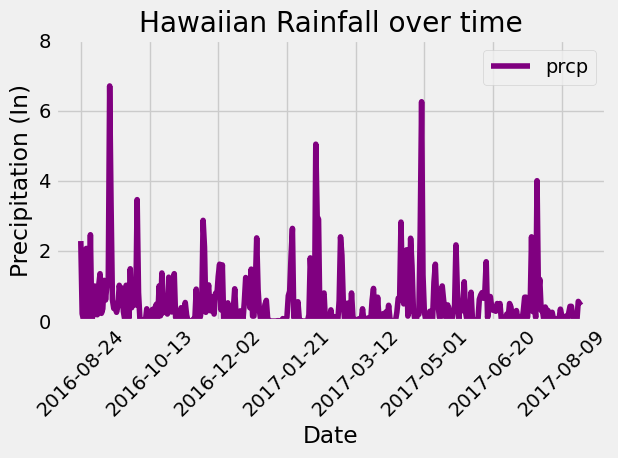

In [27]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
rain = [measurement.date, func.max(measurement.prcp)]
average_rain_fall = session.query(*rain).\
    filter(measurement.date >= "2016-08-24").\
    group_by(measurement.date).\
    order_by(measurement.date).all()


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(average_rain_fall, columns=["date", "prcp"])
df.set_index("date", inplace=True)
df.plot(color = "purple", ylim= (0,8), rot = 45)
plt.title("Hawaiian Rainfall over time")
plt.xlabel("Date")
plt.ylabel("Precipitation (In)")
plt.tight_layout()
plt.show()

# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data


In [28]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,prcp
count,365.000000
mean,0.517288
std,0.829196
min,0.000000
25%,0.040000
50%,0.250000
75%,0.650000
max,6.700000


# Exploratory Station Analysis

In [29]:
# Design a query to calculate the total number of stations in the dataset
station_list = session.query(station.name).all()

station_count = session.query(station.station).count()

print(station_list)

print(f"\nThere are {station_count} stations in the dataset.")

[('WAIKIKI 717.2, HI US',), ('KANEOHE 838.1, HI US',), ('KUALOA RANCH HEADQUARTERS 886.9, HI US',), ('PEARL CITY, HI US',), ('UPPER WAHIAWA 874.3, HI US',), ('WAIMANALO EXPERIMENTAL FARM, HI US',), ('WAIHEE 837.5, HI US',), ('HONOLULU OBSERVATORY 702.2, HI US',), ('MANOA LYON ARBO 785.2, HI US',)]

There are 9 stations in the dataset.


In [30]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_df_active = [station.station, station.name, station.latitude, station.longitude, station.elevation]
station_df_query = session.query(*station_df_active)
station_df = pd.DataFrame(station_df_query)

measurement_df_active = [measurement.station, measurement.date, measurement.prcp, measurement.tobs]
measurement_df_query = session.query(*measurement_df_active)
measurement_df = pd.DataFrame(measurement_df_query)

merge_info = pd.merge(station_df, measurement_df, on="station")
combo_data = merge_info["station"].value_counts()

combo_data

station
USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: count, dtype: int64

In [31]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
high_temp = session.query(func.max(measurement.tobs)).\
    filter(measurement.station == "USC00519281")[0][0]

low_temp = session.query(func.min(measurement.tobs)).\
    filter(measurement.station == "USC00519281")[0][0]

avg_temp = session.query(func.avg(measurement.tobs)).\
    filter(measurement.station == "USC00519281")[0][0]

print(f"Max temperature is: {high_temp}")

print(f"Min temp is: {low_temp}.")

print(f"Avg temp is: {avg_temp}.")
                 

Max temperature is: 85.0
Min temp is: 54.0.
Avg temp is: 71.66378066378067.


C:\Users\ormis\AppData\Local\Temp\ipykernel_19748\2843877919.py:11: DeprecationWarning: scipy.histogram is deprecated and will be removed in SciPy 2.0.0, use numpy.histogram instead
  hist,bin_edges = scipy.histogram(temperature, bins = 10)


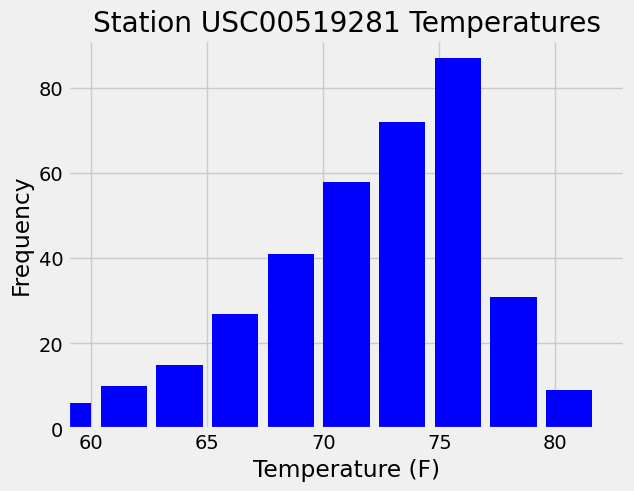

In [32]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
session.query(measurement.station, measurement.date).\
filter(measurement.station == "USC00519281").\
order_by(measurement.date.desc()).first()

temperature = session.query(measurement.tobs).\
    filter(measurement.date >= "2016-08-19").\
    filter(measurement.station == "USC00519281").all()

hist,bin_edges = scipy.histogram(temperature, bins = 10)
plt.bar(bin_edges[:-1], hist, width=2, color= "blue")
plt.title("Station USC00519281 Temperatures")
plt.xlabel("Temperature (F)")
plt.ylabel("Frequency")
plt.xlim(min(bin_edges), max(bin_edges))
plt.show()

# Close Session

In [33]:
# Close Session
session.close()